Cargamos los modulos que necesitamos.

In [1]:
import numpy as np
from matplotlib import pyplot
import sklearn as skl
import sklearn.pipeline as sklpipilne
import sklearn.model_selection as sklms
import sklearn.decomposition as skldeco
import sklearn.neighbors as skln

import sys
sys.path.append('..\install\lib')
import mnpy as mn

import reader
import metnum

Ahora debemos cargar la data con la que vamos a trabajar.

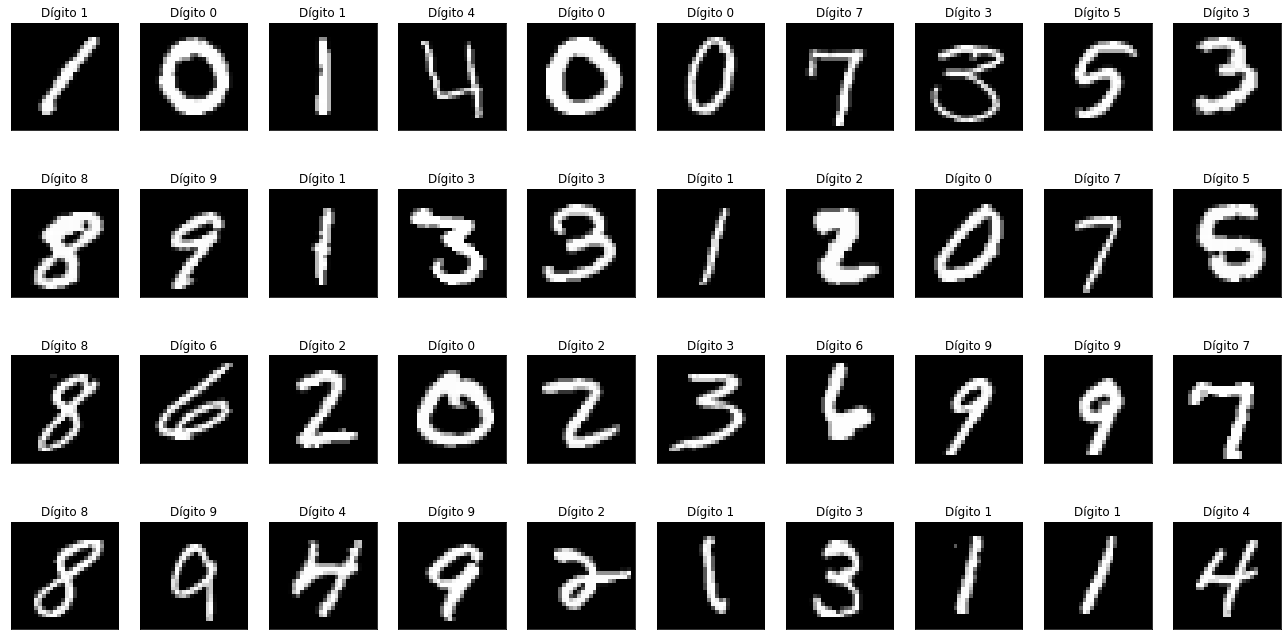

In [2]:
df = reader.read7Zip('../data/train.7z')
targets = df['label'].to_numpy()
# la primer columna es el label, el resto son los 28*28 pixeles de cada imagen
images = df.iloc[:, 1:].to_numpy()

cols = 10
rows = 4
samples = rows*cols
titles = ["Dígito %d" % digit for digit in targets[0:samples] ]
metnum.plot_gallery(images[0:samples], titles, 28, 28, rows, cols)
pyplot.show()


Configuramos el pipeline con PCA como estimator y knn como scorer

In [3]:
training_dataset = images[0:10000]
training_targets = targets[0:10000]

# estimators = [("pca", mn.PCA()), ("knn", skln.KNeighborsClassifier())]
estimators = [("pca", mn.PCA()), ("knn", mn.kNNClassifier())]
pipeline = sklpipilne.Pipeline(estimators)

param_grid = [
    {
        # 'pca__n_components': [2, 4, 8, 16, 32, 48, 64, 96],
        # 'pca__iterated_power': [64, 72, 96, 128],
        # 'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8],

        'pca__n_components': [24, 32, 48, 64, 72, 96],
        'pca__iterated_power': [64, 96, 128],
        'pca__tolerance_error': [0.0001, 0.000001],
        'knn__n_neighbors': [1, 2, 3, 4, 5],
    },
]

# kfold = sklms.KFold(n_splits=10, shuffle=True)
kfold = sklms.KFold(n_splits=10)

grid_search = sklms.GridSearchCV(estimator=pipeline, cv=kfold, param_grid=param_grid, n_jobs=8)
grid_search.fit(X=training_dataset, y=training_targets)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('pca',
                                        <mnpy.PCA object at 0x000001590D268590>),
                                       ('knn',
                                        <mnpy.kNNClassifier object at 0x000001590D0106D0>)]),
             n_jobs=8,
             param_grid=[{'knn__n_neighbors': [1, 2, 3, 4, 5],
                          'pca__iterated_power': [64, 96, 128],
                          'pca__n_components': [24, 32, 48, 64, 72, 96],
                          'pca__tolerance_error': [0.0001, 1e-06]}])

Momento de graficar

In [4]:
def graph_config(legends, results):
    old_n_neighbors = legends[0]['knn__n_neighbors']
    set_of_lists_with_results = []
    list_with_results = []
    graph_names = []
    for index, legend in enumerate(legends):
        new_n_neighbors = legend['knn__n_neighbors']

        if new_n_neighbors == old_n_neighbors:
            list_with_results.append(results[index])
        else:
            graph_names.append(old_n_neighbors)
            set_of_lists_with_results.append(list_with_results)
            list_with_results = [results[index]]
            old_n_neighbors = new_n_neighbors
    graph_names.append(new_n_neighbors)
    set_of_lists_with_results.append(list_with_results)
    return graph_names, set_of_lists_with_results

In [5]:
results = grid_search.cv_results_['mean_test_score']
legends = grid_search.cv_results_['params']

best_params = grid_search.best_params_
best_k_neighbors = best_params['knn__n_neighbors']
best_n_components = best_params['pca__n_components']

graph_names, set_of_lists_with_results = graph_config(legends, results)
print(best_params)
# print(legends)


[0.9545     0.95489999 0.9586     0.9585     0.9564     0.9571
 0.9557     0.9562     0.9564     0.9564     0.9542     0.95400001
 0.9552     0.95649999 0.9583     0.9584     0.9567     0.957
 0.95619999 0.9566     0.9566     0.9563     0.95439999 0.95420001
 0.9556     0.9556     0.9583     0.9583     0.9567     0.9568
 0.9559     0.95609999 0.9561     0.9564     0.9545     0.9542
 0.9548     0.95569998 0.95829999 0.95829999 0.95699999 0.9566
 0.9563     0.9557     0.9568     0.9568     0.9544     0.95470001
 0.95539999 0.95519999 0.9584     0.9584     0.95699999 0.95699999
 0.9562     0.95589999 0.9565     0.95630001 0.9544     0.95470001
 0.9554     0.95549999 0.9584     0.9583     0.9572     0.95689999
 0.9563     0.95599999 0.9562     0.9562     0.95440001 0.95410001
 0.9551     0.95519999 0.958      0.9581     0.95699999 0.95689999
 0.9561     0.9561     0.95650001 0.9561     0.9545     0.95460001
 0.9548     0.9551     0.9585     0.9584     0.95699999 0.95739999
 0.95629999 0.95